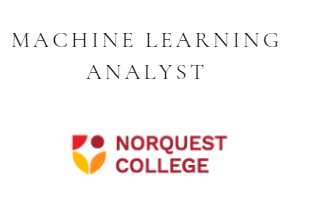

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [ ]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Load the dataset with a specified encoding
data = pd.read_csv('Cleaned Proposed Data Collection.csv', encoding='latin1')

In [ ]:
data.head()

ï»¿Drop Off Location              Stake  \
0    Londonderry Chapel  Bonnie Doon Stake   
1  Gateway Stake Centre      Gateway Stake   
2  Gateway Stake Centre      Gateway Stake   
3  Gateway Stake Centre      Gateway Stake   
4    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  NaN   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Comment Sentiments Comments  Number of routes completed  \
0                NaN      NaN                         NaN   
1                NaN      NaN                         2.0   
2                NaN      NaN                         NaN   
3                NaN      NaN                         1.0   
4                NaN      NaN                         NaN   

   # of Doors in Route The time you started at: The time you ended at  
0                 14.0              10:00:00 AM           10:25:00 AM  
1                144.0              10:00:00 AM           10:30:00 AM  
2                186.0              10:00:00 AM           10:30:00 AM  
3                  NaN              10:00:00 AM           10:30:00 AM  
4                  1.0                      NaN                   NaN

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ï»¿Drop Off Location                                  452 non-null    object 
 1   Stake                                                 452 non-null    object 
 2   # of Adult Volunteers in this route                   448 non-null    float64
 3   # of Youth Volunteers in this route                   445 non-null    float64
 4   # of Donation Bags Collected/Route                    445 non-null    float64
 5   Time to Complete (in minutes) pick up of bags /route  446 non-null    float64
 6   Did you complete more than 1 route?                   452 non-null    object 
 7   Ward/Branch                                           452 non-null    object 
 8   Comment Sentiments                                    96 non

Ward/Branch had multiple columns, edit and add all to one column

In [ ]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])
data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])

# Calculate the time spent and create a new column "Time Spent"
data['Time Spent'] = (data['The time you ended at'] - data['The time you started at:']).dt.total_seconds() / 60

# Print the updated DataFrame
print(data[['The time you started at:', 'The time you ended at', 'Time Spent']])


    The time you started at: The time you ended at  Time Spent
0        2024-10-30 10:00:00   2024-10-30 10:25:00        25.0
1        2024-10-30 10:00:00   2024-10-30 10:30:00        30.0
2        2024-10-30 10:00:00   2024-10-30 10:30:00        30.0
3        2024-10-30 10:00:00   2024-10-30 10:30:00        30.0
4                        NaT                   NaT         NaN
..                       ...                   ...         ...
447      2024-10-30 10:30:00   2024-10-30 11:15:00        45.0
448      2024-10-30 10:30:00   2024-10-30 11:15:00        45.0
449      2024-10-30 18:00:00   2024-10-30 20:00:00       120.0
450      2024-10-30 10:30:00   2024-10-30 13:00:00       150.0
451                      NaT                   NaT         NaN

[452 rows x 3 columns]


<ipython-input-173-74e8c0932c57>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you ended at'] = pd.to_datetime(data['The time you ended at'])
<ipython-input-173-74e8c0932c57>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['The time you started at:'] = pd.to_datetime(data['The time you started at:'])


In [ ]:
data.head()

ï»¿Drop Off Location              Stake  \
0    Londonderry Chapel  Bonnie Doon Stake   
1  Gateway Stake Centre      Gateway Stake   
2  Gateway Stake Centre      Gateway Stake   
3  Gateway Stake Centre      Gateway Stake   
4    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  NaN   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Comment Sentiments Comments  Number of routes completed  \
0                NaN      NaN                         NaN   
1                NaN      NaN                         2.0   
2                NaN      NaN                         NaN   
3                NaN      NaN                         1.0   
4                NaN      NaN                         NaN   

   # of Doors in Route The time you started at: The time you ended at  \
0                 14.0      2024-10-30 10:00:00   2024-10-30 10:25:00   
1                144.0      2024-10-30 10:00:00   2024-10-30 10:30:00   
2                186.0      2024-10-30 10:00:00   2024-10-30 10:30:00   
3                  NaN      2024-10-30 10:00:00   2024-10-30 10:30:00   
4                  1.0                      NaT                   NaT   

   Time Spent  
0        25.0  
1        30.0  
2        30.0  
3        30.0  
4         NaN

In [ ]:
data['Time Spent'].unique()

array([  25.,   30.,   nan,   20.,   22.,   49.,   35.,   40.,   55.,
         45.,   60.,   63.,   32.,  740.,   38.,   50.,   39.,   51.,
         73.,   13.,  100.,   17.,   65.,   57.,   56.,   80.,   33.,
         69.,   15.,   90.,   75.,   89.,   67.,   81.,   44.,   54.,
         95.,   28.,   70.,   42.,   47.,   74.,  120.,  105.,   36.,
        108.,   52.,   96.,   98.,   83.,   24.,   88.,   31.,   58.,
       -660.,   18.,   34.,  114.,   53., -657.,   10., -645.,  109.,
       -687., -690., -643., -655., -675., -685., -649.,   85., -636.,
       -647.,   21.,   23.,   27., -665., -613., -615.,   78.,  137.,
       -641., -620., -610., -593.,   48., -630.,   61., -597., -600.,
       -680.,   37.,   43., -640., -608.,  140., -625.,   92., -634.,
        170., -570., -605.,  103.,  180.,  754.,  750.,  145.,  165.,
        110.,  135., -575.,  220.,  150.,   71.,   41.,  240.])

In [ ]:
# Ensure 'Time Spent' column exists and is numeric
if 'Time Spent' in data.columns:
    data['Time Spent'] = data['Time Spent'].abs()
    print(data['Time Spent'].unique())
else:
    print("'Time Spent' column not found in the DataFrame.")

[ 25.  30.  nan  20.  22.  49.  35.  40.  55.  45.  60.  63.  32. 740.
  38.  50.  39.  51.  73.  13. 100.  17.  65.  57.  56.  80.  33.  69.
  15.  90.  75.  89.  67.  81.  44.  54.  95.  28.  70.  42.  47.  74.
 120. 105.  36. 108.  52.  96.  98.  83.  24.  88.  31.  58. 660.  18.
  34. 114.  53. 657.  10. 645. 109. 687. 690. 643. 655. 675. 685. 649.
  85. 636. 647.  21.  23.  27. 665. 613. 615.  78. 137. 641. 620. 610.
 593.  48. 630.  61. 597. 600. 680.  37.  43. 640. 608. 140. 625.  92.
 634. 170. 570. 605. 103. 180. 754. 750. 145. 165. 110. 135. 575. 220.
 150.  71.  41. 240.]


In [ ]:
data['Comment Sentiments'] = data['Comment Sentiments'].fillna('Neutral')

In [ ]:
data['Comments'] = data['Comments'].fillna('No Comments')

In [ ]:
data.head()

ï»¿Drop Off Location              Stake  \
0    Londonderry Chapel  Bonnie Doon Stake   
1  Gateway Stake Centre      Gateway Stake   
2  Gateway Stake Centre      Gateway Stake   
3  Gateway Stake Centre      Gateway Stake   
4    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                                  3.0   
1                                  3.0                                  1.0   
2                                  2.0                                  0.0   
3                                  2.0                                  NaN   
4                                  1.0                                  0.0   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Comment Sentiments     Comments  Number of routes completed  \
0            Neutral  No Comments                         NaN   
1            Neutral  No Comments                         2.0   
2            Neutral  No Comments                         NaN   
3            Neutral  No Comments                         1.0   
4            Neutral  No Comments                         NaN   

   # of Doors in Route The time you started at: The time you ended at  \
0                 14.0      2024-10-30 10:00:00   2024-10-30 10:25:00   
1                144.0      2024-10-30 10:00:00   2024-10-30 10:30:00   
2                186.0      2024-10-30 10:00:00   2024-10-30 10:30:00   
3                  NaN      2024-10-30 10:00:00   2024-10-30 10:30:00   
4                  1.0                      NaT                   NaT   

   Time Spent  
0        25.0  
1        30.0  
2        30.0  
3        30.0  
4         NaN

In [ ]:
# Drop the "The time you started at" and "The time you ended at" columns
data = data.drop(columns=['The time you started at:', 'The time you ended at'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ï»¿Drop Off Location                                  452 non-null    object 
 1   Stake                                                 452 non-null    object 
 2   # of Adult Volunteers in this route                   448 non-null    float64
 3   # of Youth Volunteers in this route                   445 non-null    float64
 4   # of Donation Bags Collected/Route                    445 non-null    float64
 5   Time to Complete (in minutes) pick up of bags /route  446 non-null    float64
 6   Did you complete more than 1 route?                   452 non-null    object 
 7   Ward/Branch                                           452 non-null    object 
 8   Comment Sentiments                                    452 no

In [ ]:
# Convert "Number of routes completed" and "# of Doors in Route" columns to numeric. Currently "objects"
data['Number of routes completed'] = pd.to_numeric(data['Number of routes completed'], errors='coerce')
data['# of Doors in Route'] = pd.to_numeric(data['# of Doors in Route'], errors='coerce')

In [ ]:
# Handle missing values (if any)
# Calculate the average values for 'Number of routes completed' and '# of Doors in Route'
avg_routes_completed = data['Number of routes completed'].mean()
avg_doors_in_route = data['# of Doors in Route'].mean()
avg_time_spent = data['Time Spent'].mean()
avg_Adult_Volunteers_in_this_route = data['# of Adult Volunteers in this route'].mean()
avg_Youth_Volunteers_in_this_route = data['# of Youth Volunteers in this route'].mean()
avg_Donation_Bags_Collected = data['# of Donation Bags Collected/Route'].mean()
avg_time_to_complete_pickup_bags = data['Time to Complete (in minutes) pick up of bags /route'].mean()

# Fill missing values with the averages
data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
data['# of Doors in Route'].fillna(avg_doors_in_route, inplace=True)
data['Time Spent'].fillna(avg_time_spent, inplace=True)
data['# of Adult Volunteers in this route'].fillna(avg_Adult_Volunteers_in_this_route, inplace=True)
data['# of Youth Volunteers in this route'].fillna(avg_Youth_Volunteers_in_this_route, inplace=True)
data['# of Donation Bags Collected/Route'].fillna(avg_Donation_Bags_Collected, inplace=True)
data['Time to Complete (in minutes) pick up of bags /route'].fillna(avg_time_to_complete_pickup_bags, inplace=True)
data.head()

<ipython-input-183-b95b0f07c15d>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Number of routes completed'].fillna(avg_routes_completed, inplace=True)
<ipython-input-183-b95b0f07c15d>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

ï»¿Drop Off Location              Stake  \
0    Londonderry Chapel  Bonnie Doon Stake   
1  Gateway Stake Centre      Gateway Stake   
2  Gateway Stake Centre      Gateway Stake   
3  Gateway Stake Centre      Gateway Stake   
4    Londonderry Chapel  Bonnie Doon Stake   

   # of Adult Volunteers in this route  # of Youth Volunteers in this route  \
0                                  1.0                             3.000000   
1                                  3.0                             1.000000   
2                                  2.0                             0.000000   
3                                  2.0                             1.564045   
4                                  1.0                             0.000000   

   # of Donation Bags Collected/Route  \
0                                14.0   
1                                18.0   
2                                20.0   
3                                20.0   
4                                 2.0   

   Time to Complete (in minutes) pick up of bags /route  \
0                                               25.0      
1                                               25.0      
2                                               30.0      
3                                               25.0      
4                                                5.0      

  Did you complete more than 1 route?           Ward/Branch  \
0                                  No        Clareview Ward   
1                                 Yes  Crawford Plains Ward   
2                                  No     Silver Berry Ward   
3                                 Yes  Crawford Plains Ward   
4                                  No      Londonderry Ward   

  Comment Sentiments     Comments  Number of routes completed  \
0            Neutral  No Comments                    2.414966   
1            Neutral  No Comments                    2.000000   
2            Neutral  No Comments                    2.414966   
3            Neutral  No Comments                    1.000000   
4            Neutral  No Comments                    2.414966   

   # of Doors in Route  Time Spent  
0            14.000000   25.000000  
1           144.000000   30.000000  
2           186.000000   30.000000  
3           195.504808   30.000000  
4             1.000000  141.852029

In [ ]:
data['Comment Sentiments'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ï»¿Drop Off Location                                    0
Stake                                                   0
# of Adult Volunteers in this route                     0
# of Youth Volunteers in this route                     0
# of Donation Bags Collected/Route                      0
Time to Complete (in minutes) pick up of bags /route    0
Did you complete more than 1 route?                     0
Ward/Branch                                             0
Comment Sentiments                                      0
Comments                                                0
Number of routes completed                              0
# of Doors in Route                                     0
Time Spent                                              0
dtype: int64


In [ ]:
data['Number of routes completed'].unique()

array([2.41496599, 2.        , 1.        , 3.        , 4.        ,
       6.        , 8.        , 5.        , 7.        ])

In [ ]:

# Rename columns for clarity
data = data.rename(columns={
    'Timestamp': 'Date',
    'ï»¿Drop Off Location': 'Drop Off Location',
    'City': 'City',
    'Stake': 'Stake',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers in this route': '# of Adult Volunteers',
    '# of Youth Volunteers in this route': '# of Youth Volunteers',
    '# of Donation Bags Collected/Route': 'Donation Bags Collected',
    'Time to Complete (in minutes) pick up of bags /route': 'Time to Complete (min)',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'Number of routes completed': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route',
    'Comment Sentiments': 'Comment Sentiments',
    'Comments': 'Comments or Feedback'
})


In [ ]:
# Print the dtypes for each column
data.dtypes

Drop Off Location                 object
Stake                             object
# of Adult Volunteers            float64
# of Youth Volunteers            float64
Donation Bags Collected          float64
Time to Complete (min)           float64
Completed More Than One Route     object
Ward/Branch                       object
Comment Sentiments                object
Comments or Feedback              object
Routes Completed                 float64
Doors in Route                   float64
Time Spent                       float64
dtype: object

In [ ]:
# Convert columns to integer data types
int_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected','Routes Completed','Doors in Route','Time to Complete (min)']
data[int_columns] = data[int_columns].astype(int)

In [ ]:
data['# of Adult Volunteers'].unique()

array([ 1,  3,  2,  5,  4,  7, 46, 19,  6, 24, 26,  0, 33, 38])

In [ ]:
data['# of Youth Volunteers'].unique()

array([ 3,  1,  0,  4,  2,  5,  7, 20,  8,  9, 10])

In [ ]:
data['Time Spent'].value_counts()

Time Spent
60.000000     41
141.852029    33
30.000000     33
45.000000     31
40.000000     24
              ..
137.000000     1
641.000000     1
83.000000      1
610.000000     1
240.000000     1
Name: count, Length: 116, dtype: int64

In [ ]:
# Calculate the 99th percentile of 'Time Spent'
percentile_99 = data['Time Spent'].quantile(0.99)

# Cap the outliers at the 99th percentile
data['Time Spent'] = data['Time Spent'].clip(upper=percentile_99)

# Verify the capping
print(data['Time Spent'].describe())

count    452.000000
mean     141.467073
std      199.706216
min       10.000000
25%       40.000000
50%       60.000000
75%      120.000000
max      690.000000
Name: Time Spent, dtype: float64


In [ ]:
threshold = 150  # minutes

mean_time_spent = data[data['Time Spent'] <= threshold]['Time Spent'].mean()

# Replace outliers with the mean
data.loc[data['Time Spent'] > threshold, 'Time Spent'] = mean_time_spent

# Verify the replacement
print(data['Time Spent'].describe())

count    452.000000
mean      63.370769
std       32.961583
min       10.000000
25%       40.000000
50%       60.000000
75%       70.250000
max      150.000000
Name: Time Spent, dtype: float64


In [ ]:
data['Time Spent'].unique()

array([ 25.        ,  30.        , 141.85202864,  20.        ,
        22.        ,  49.        ,  35.        ,  40.        ,
        55.        ,  45.        ,  60.        ,  63.        ,
        32.        ,  63.37076929,  38.        ,  50.        ,
        39.        ,  51.        ,  73.        ,  13.        ,
       100.        ,  17.        ,  65.        ,  57.        ,
        56.        ,  80.        ,  33.        ,  69.        ,
        15.        ,  90.        ,  75.        ,  89.        ,
        67.        ,  81.        ,  44.        ,  54.        ,
        95.        ,  28.        ,  70.        ,  42.        ,
        47.        ,  74.        , 120.        , 105.        ,
        36.        , 108.        ,  52.        ,  96.        ,
        98.        ,  83.        ,  24.        ,  88.        ,
        31.        ,  58.        ,  18.        ,  34.        ,
       114.        ,  53.        ,  10.        , 109.        ,
        85.        ,  21.        ,  23.        ,  27.  

In [ ]:
data['Time Spent'] = data['Time Spent'].astype(int)

In [ ]:
data['Time Spent'].unique()

array([ 25,  30, 141,  20,  22,  49,  35,  40,  55,  45,  60,  63,  32,
        38,  50,  39,  51,  73,  13, 100,  17,  65,  57,  56,  80,  33,
        69,  15,  90,  75,  89,  67,  81,  44,  54,  95,  28,  70,  42,
        47,  74, 120, 105,  36, 108,  52,  96,  98,  83,  24,  88,  31,
        58,  18,  34, 114,  53,  10, 109,  85,  21,  23,  27,  78, 137,
        48,  61,  37,  43, 140,  92, 103, 145, 110, 135, 150,  71,  41])

If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [ ]:
# Convert columns to the right data types
data['Time Spent'] = data['Time Spent'].astype(int)  # Convert 'Time Spent' to float

In [ ]:
data.head()

Drop Off Location              Stake  # of Adult Volunteers  \
0    Londonderry Chapel  Bonnie Doon Stake                      1   
1  Gateway Stake Centre      Gateway Stake                      3   
2  Gateway Stake Centre      Gateway Stake                      2   
3  Gateway Stake Centre      Gateway Stake                      2   
4    Londonderry Chapel  Bonnie Doon Stake                      1   

   # of Youth Volunteers  Donation Bags Collected  Time to Complete (min)  \
0                      3                       14                      25   
1                      1                       18                      25   
2                      0                       20                      30   
3                      1                       20                      25   
4                      0                        2                       5   

  Completed More Than One Route           Ward/Branch Comment Sentiments  \
0                            No        Clareview Ward            Neutral   
1                           Yes  Crawford Plains Ward            Neutral   
2                            No     Silver Berry Ward            Neutral   
3                           Yes  Crawford Plains Ward            Neutral   
4                            No      Londonderry Ward            Neutral   

  Comments or Feedback  Routes Completed  Doors in Route  Time Spent  
0          No Comments                 2              14          25  
1          No Comments                 2             144          30  
2          No Comments                 2             186          30  
3          No Comments                 1             195          30  
4          No Comments                 2               1         141

# Exploratory Data Analysis

In [ ]:
data.describe()

# of Adult Volunteers  # of Youth Volunteers  Donation Bags Collected  \
count             452.000000             452.000000               452.000000   
mean                2.422566               1.555310                32.745575   
std                 3.594863               1.860797                35.346926   
min                 0.000000               0.000000                 1.000000   
25%                 2.000000               0.000000                17.000000   
50%                 2.000000               1.000000                25.000000   
75%                 2.000000               3.000000                37.000000   
max                46.000000              20.000000               555.000000   

       Time to Complete (min)  Routes Completed  Doors in Route  Time Spent  
count              452.000000        452.000000      452.000000  452.000000  
mean                55.457965          2.134956      195.464602   63.254425  
std                 35.137557          0.626056      173.471701   32.813717  
min                  2.000000          1.000000        1.000000   10.000000  
25%                 30.000000          2.000000      117.500000   40.000000  
50%                 45.000000          2.000000      173.500000   60.000000  
75%                 60.000000          2.000000      215.000000   70.250000  
max                270.000000          8.000000     2500.000000  150.000000

Text(0.5, 1.0, 'Distribution of Adult Volunteers')

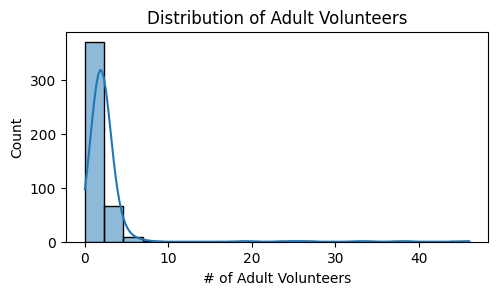

In [ ]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

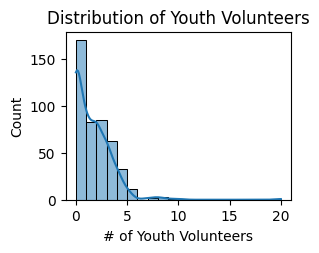

In [ ]:
plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

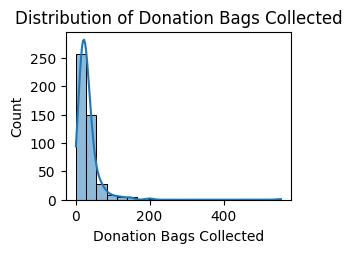

In [ ]:
plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

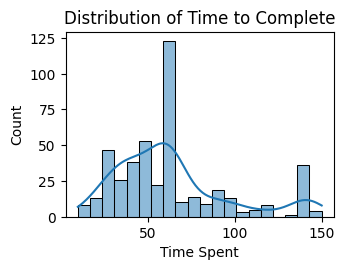

In [ ]:
plt.subplot(2, 2, 4)
sns.histplot(data['Time Spent'], bins=20, kde=True)
plt.title('Distribution of Time to Complete')

plt.tight_layout()
plt.show()


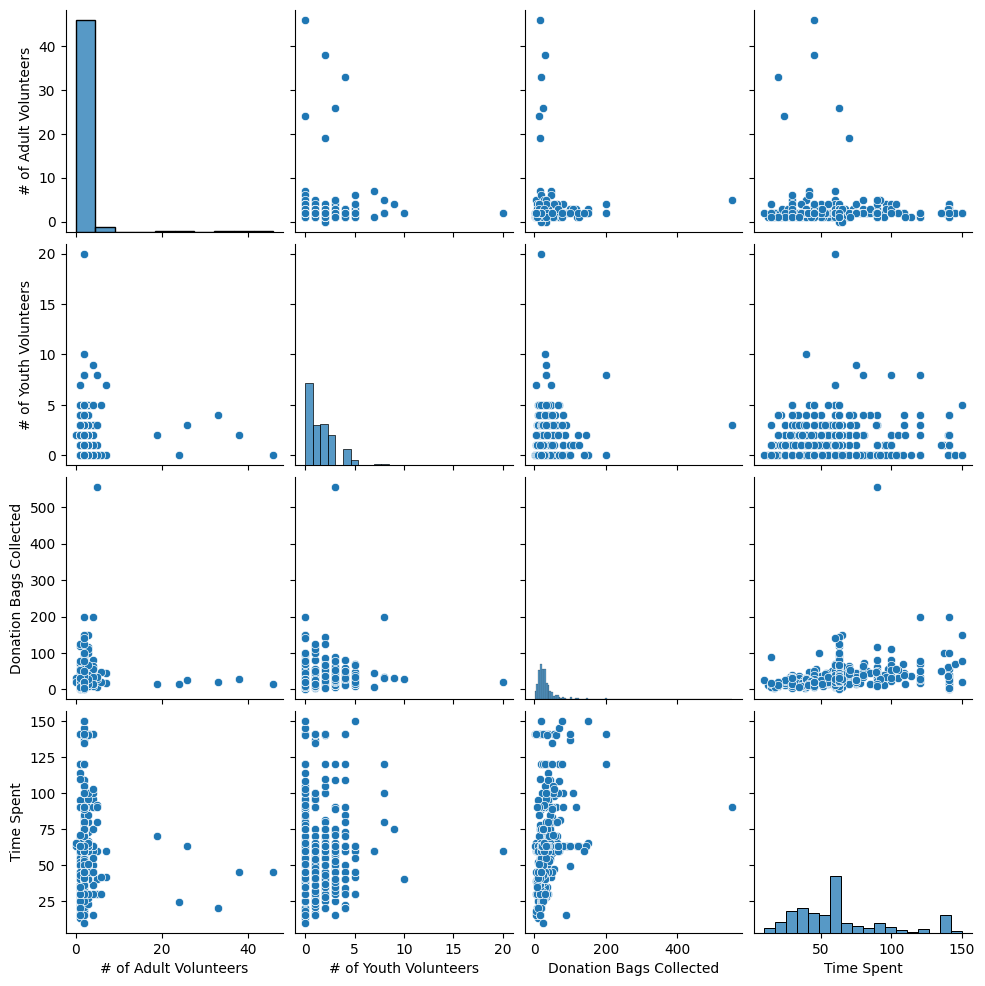

In [ ]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time Spent']])
plt.show()

In [ ]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
if 'categorical_column' in data.columns:
     sns.countplot(x='categorical_column', data=data)
     plt.title('Countplot of Categorical Column')
     plt.show()

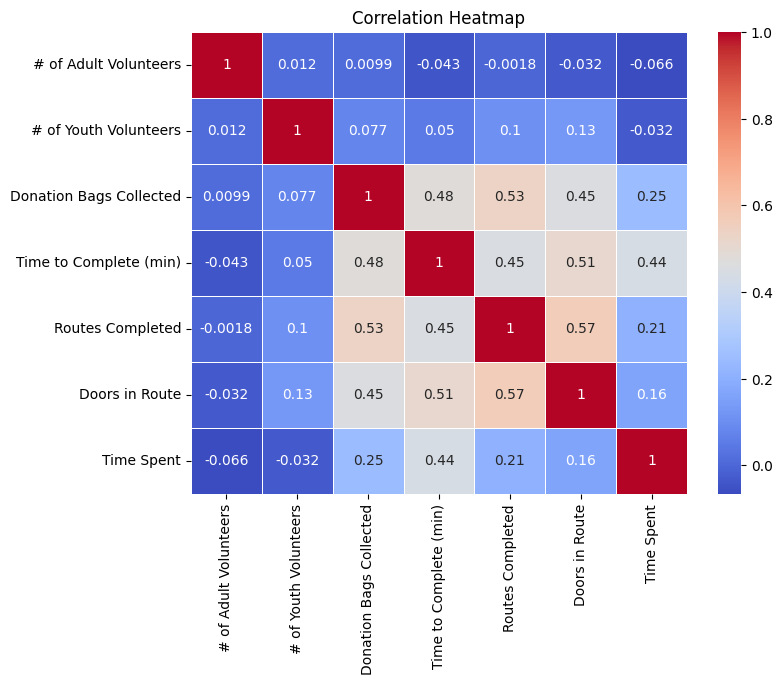

In [ ]:
# # Correlation heatmap for numerical features
#correlation_matrix = data.corr()
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


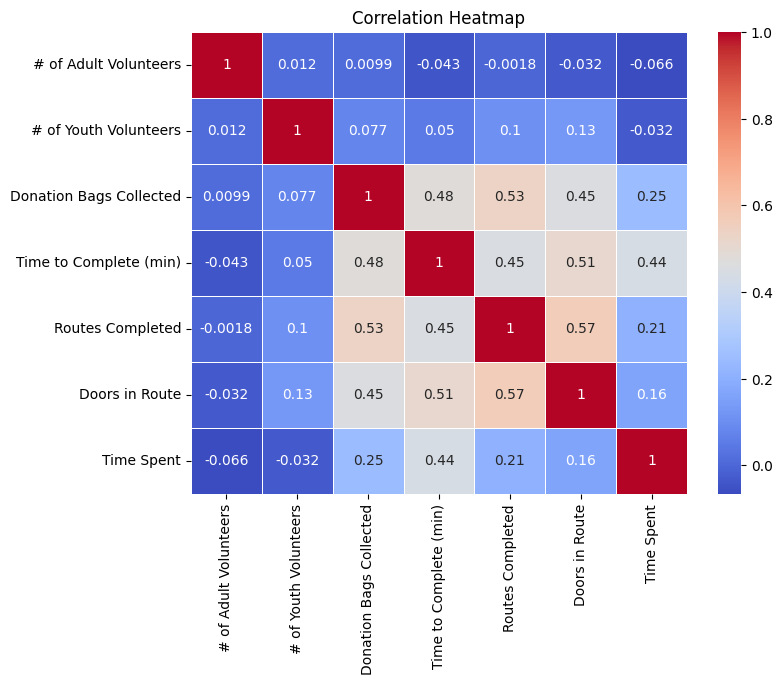

In [ ]:
# Correlation heatmap for numerical features
import numpy as np
correlation_matrix = data.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

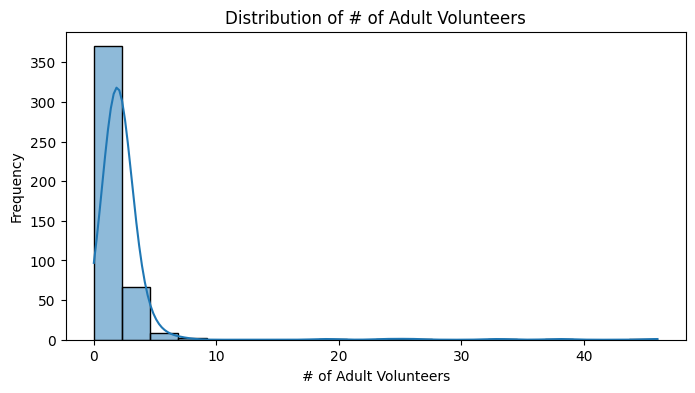

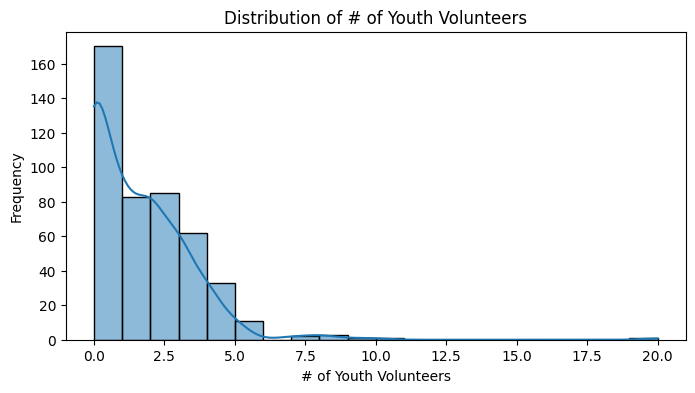

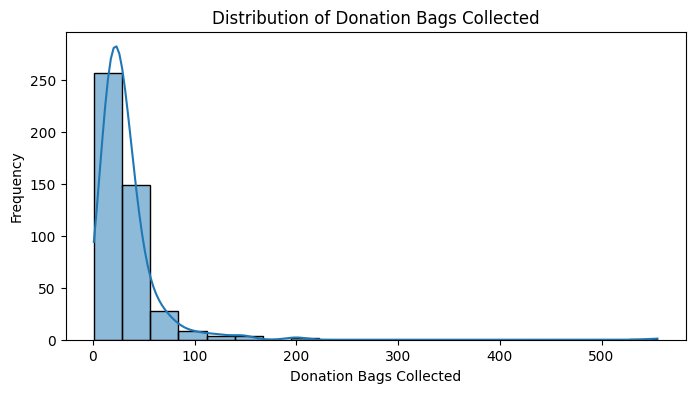

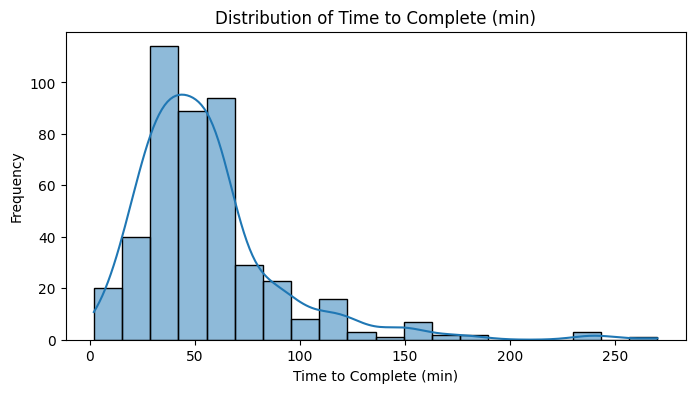

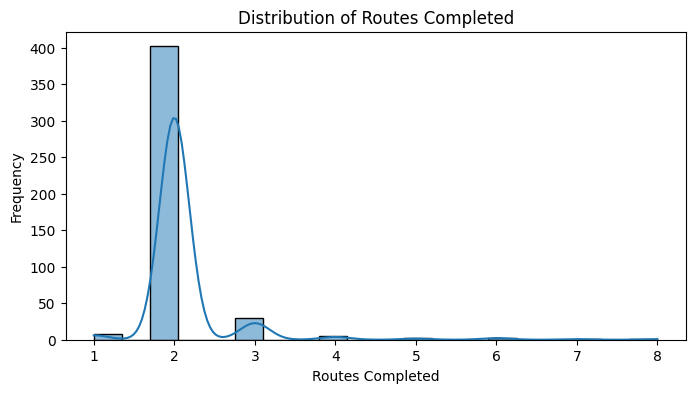

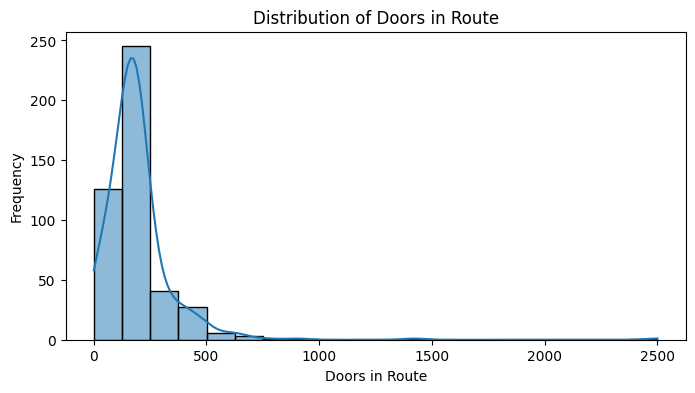

In [ ]:

# Distribution of numerical variables
numerical_columns = ['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected', 'Time to Complete (min)', 'Routes Completed', 'Doors in Route']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=data, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

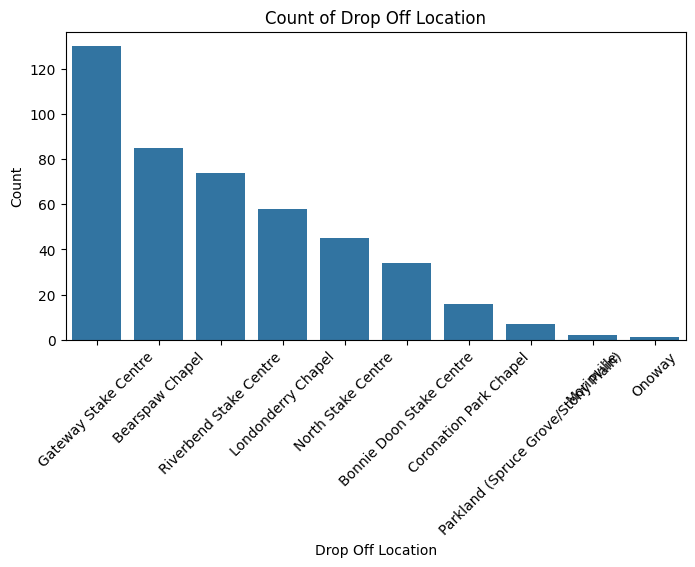

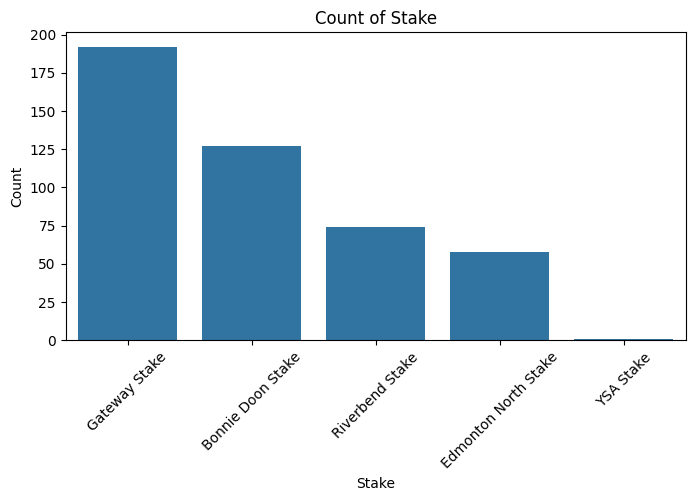

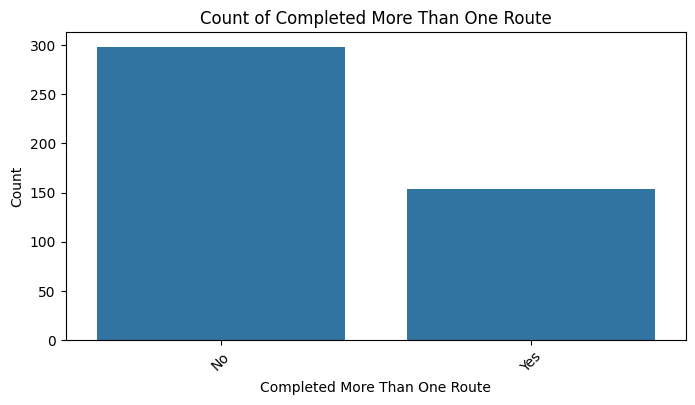

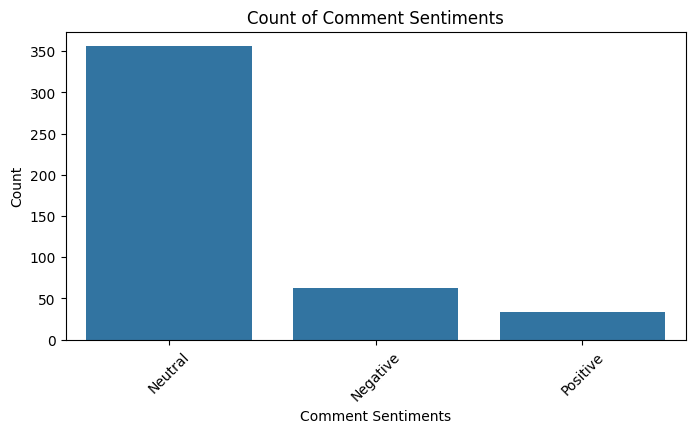

In [ ]:
# Count of categorical variables
categorical_columns = ['Drop Off Location','Stake','Completed More Than One Route', 'Comment Sentiments']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-213-0dc7f9c668a9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


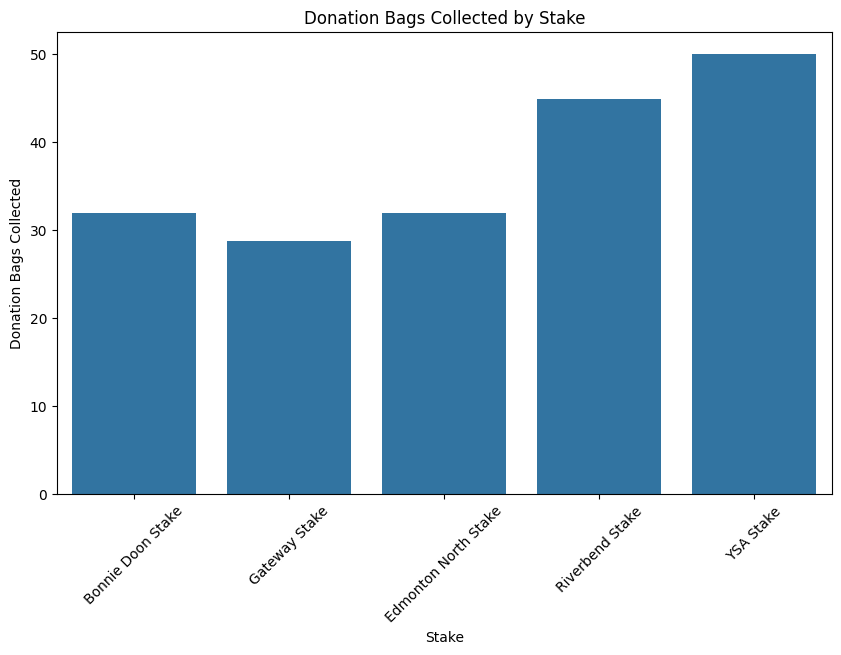

In [ ]:

# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#download a Cleaned version of the data

from google.colab import files

# Save the cleaned DataFrame to a CSV file
data.to_csv('Cleaned_Proposed_Data_Collection.csv', index=False)

# Download the CSV file
files.download('Cleaned_Proposed_Data_Collection.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#AutoEDA

In [ ]:
!pip install pandas-profiling[notebook,html]

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

# Generate Report

In [ ]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Interview Readiness

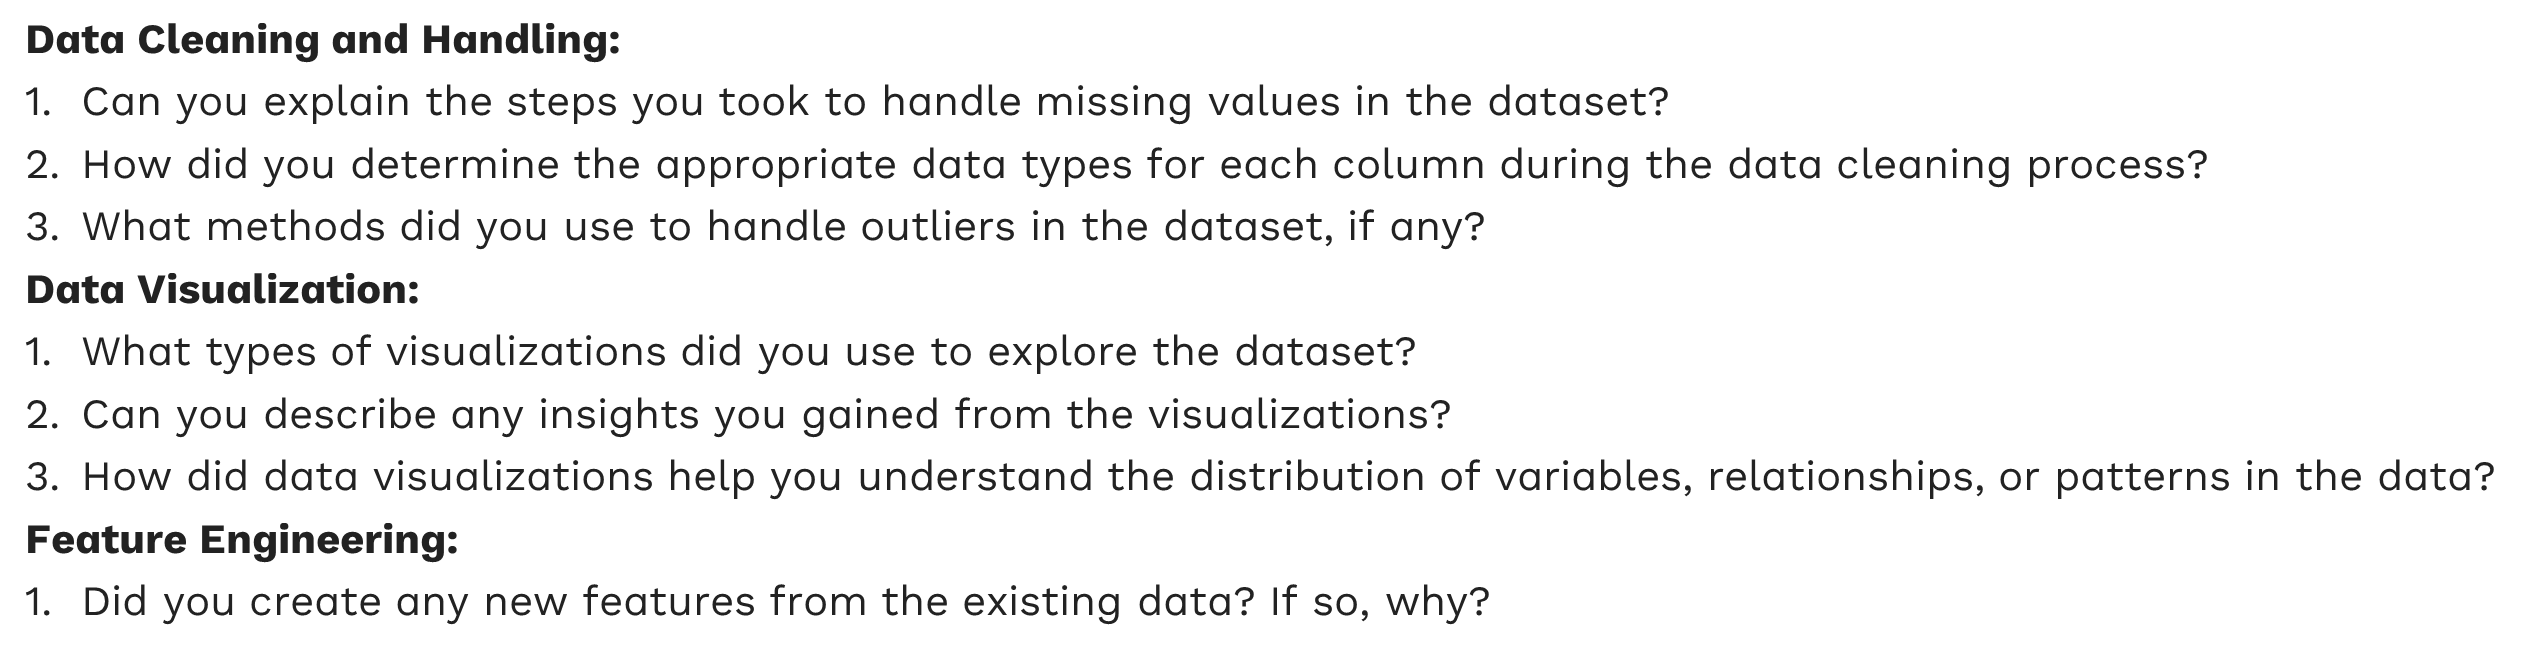

**Data Cleaning and handling:-**

**Answer 1 **= To handle the missing values in the dataset, I have calculated the mean of the numerical data and by using the fillna function I have filled the mean of those columns in the missing values cells. In the Drop-Off Location Columns, there are just two rows that don’t contain the name of the Drop-Off location therefore to remove the missing values I deleted those two rows. Moreover, to find the missing values in the “Did you complete more than 1 route?” that contain information in the “yes” and “no” I converted them into Boolean values 1 and 0 respectively and filled the mean in place of the missing values. For the comments column in the place of the missing values, I fill in “No Comments” to handle the missing values.

**Answer 2 **= To determine the appropriate data type for each column during the cleaning process, I can use the dtypes and the data.info() whether the data is float, integer or object. To convert the data type of some columns from string to integer, .astype(int) is used, and .astype(float) is used to convert the data into the float value. The categorical columns are classified properly to optimise memory and ensure the model's performance.

**Answer 3 =** I identify no outliers in the “Food Drive” dataset. If there are any outliers in the dataset, I just removed the outliers as they didn’t fit in the data and caused errors. To handle the numerical outliers, I can use the log transformation.

**Data Visualization:-**

**Answer 1** = To capture insights from the data, I have used different types of visualisations such as bar charts, histograms, scatter plots, heatmaps, line graphs and pie charts.  For instance, a Pie chart is used to analyse the numerical proportion of the data, a heatmap is a good visual to find the correlation between the variables i.e. whether it is positively correlated or negatively correlated or has no correlation. Furthermore, the bar graph is used to make the comparison in the different variables of the dataset; despite finding the outliers in the dataset, the scatter plot is the most optimal visualisation. The line graph is used to understand the trends in the time taken for collections.

**Answer 2** = A  Pie chart is used to find the stake with the highest percentage of donation bags collected. Moreover, a heatmap is a good visual to find the correlation between the variables i.e. whether it is positively correlated or negatively correlated or has no correlation from the heatmap in the dataset it is visible that the dataset is almost positively correlated. Furthermore, the bar graph is used to compare the number of donation bags collected based on the different stakes and wards and compare how many complete more than one route. Despite finding the outliers in the dataset, the scatter plot is the most optimal visualisation. The line graph is used to understand the trends in the time taken for collections.

**Answer 3** = The visualisation in the dataset helps in identifying clusters, relationships and trends in the data. For instance, a Scatter plot helps to see the potential linear relationships in the various variables of the datasets, line graphs help to analyse the trends based on the different wards and branches, and box plots are used to identify the outliers in the dataset, bar graphs are used to compare the data based on various ward/ branch and stake over the number of bags collected and histograms helps to understand the shape of distribution based on the different variables.

**Feature Engineering:-**

**Answer 1** = Yes, I have created many new features from the dataset. For example, I have converted the timestamp column into the date showing the date, month and year. Furthermore, the time started, and the time ended to collect the donation bags is converted into the total time spent on the collection in a different ward. Moreover, to analyse the overall experience of the people while donations, I used the comments columns and based on the comments I converted them into a comment sentiment column which contains information in the form of good, bad, suggestion, other and no comments form which is assigned as 1, 0, 2and 3 respectively as it hard to analyse on the categorical data in comparison with the numerical data. After calculating the average mean of the whole column, I filled in the place of the missing values to understand how many are happy with the food drive how many give suggestions that the food drive employees can work on and if the community is unhappy what is the reason and how can we fix that. Moreover, the ‘Did you complete more than one route, contains the information in the “Yes” and “No” forms which are converted into 1 and 0 respectively to understand the number of people who completed more than one route if ‘yes’ then what is route number/name they completed and how may bags did they collect from the additional route.


# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective

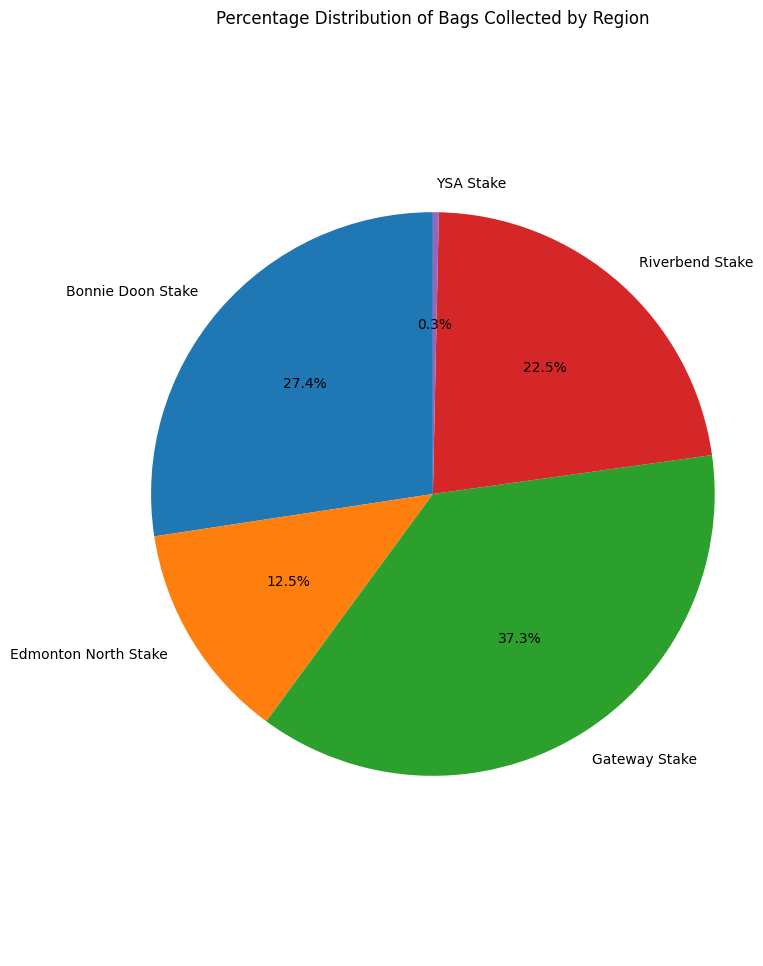

In [ ]:
# Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

import matplotlib.pyplot as plt
# Assuming your DataFrame is named 'df' and has columns 'Region' and 'Bags Collected'

# Group by region and calculate the total bags collected for each region
region_bags = data.groupby('Stake')['Donation Bags Collected'].sum()

# Create a pie chart
plt.figure(figsize=(8, 12))
plt.pie(region_bags, labels=region_bags.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Distribution of Bags Collected by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
